In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load and Explore Data

In [7]:
df = pd.read_csv(r"D:\for internship\train.csv")
df.info()
df.isnull().sum()
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, M

# Visual Exploration

# Pairplot for relationships

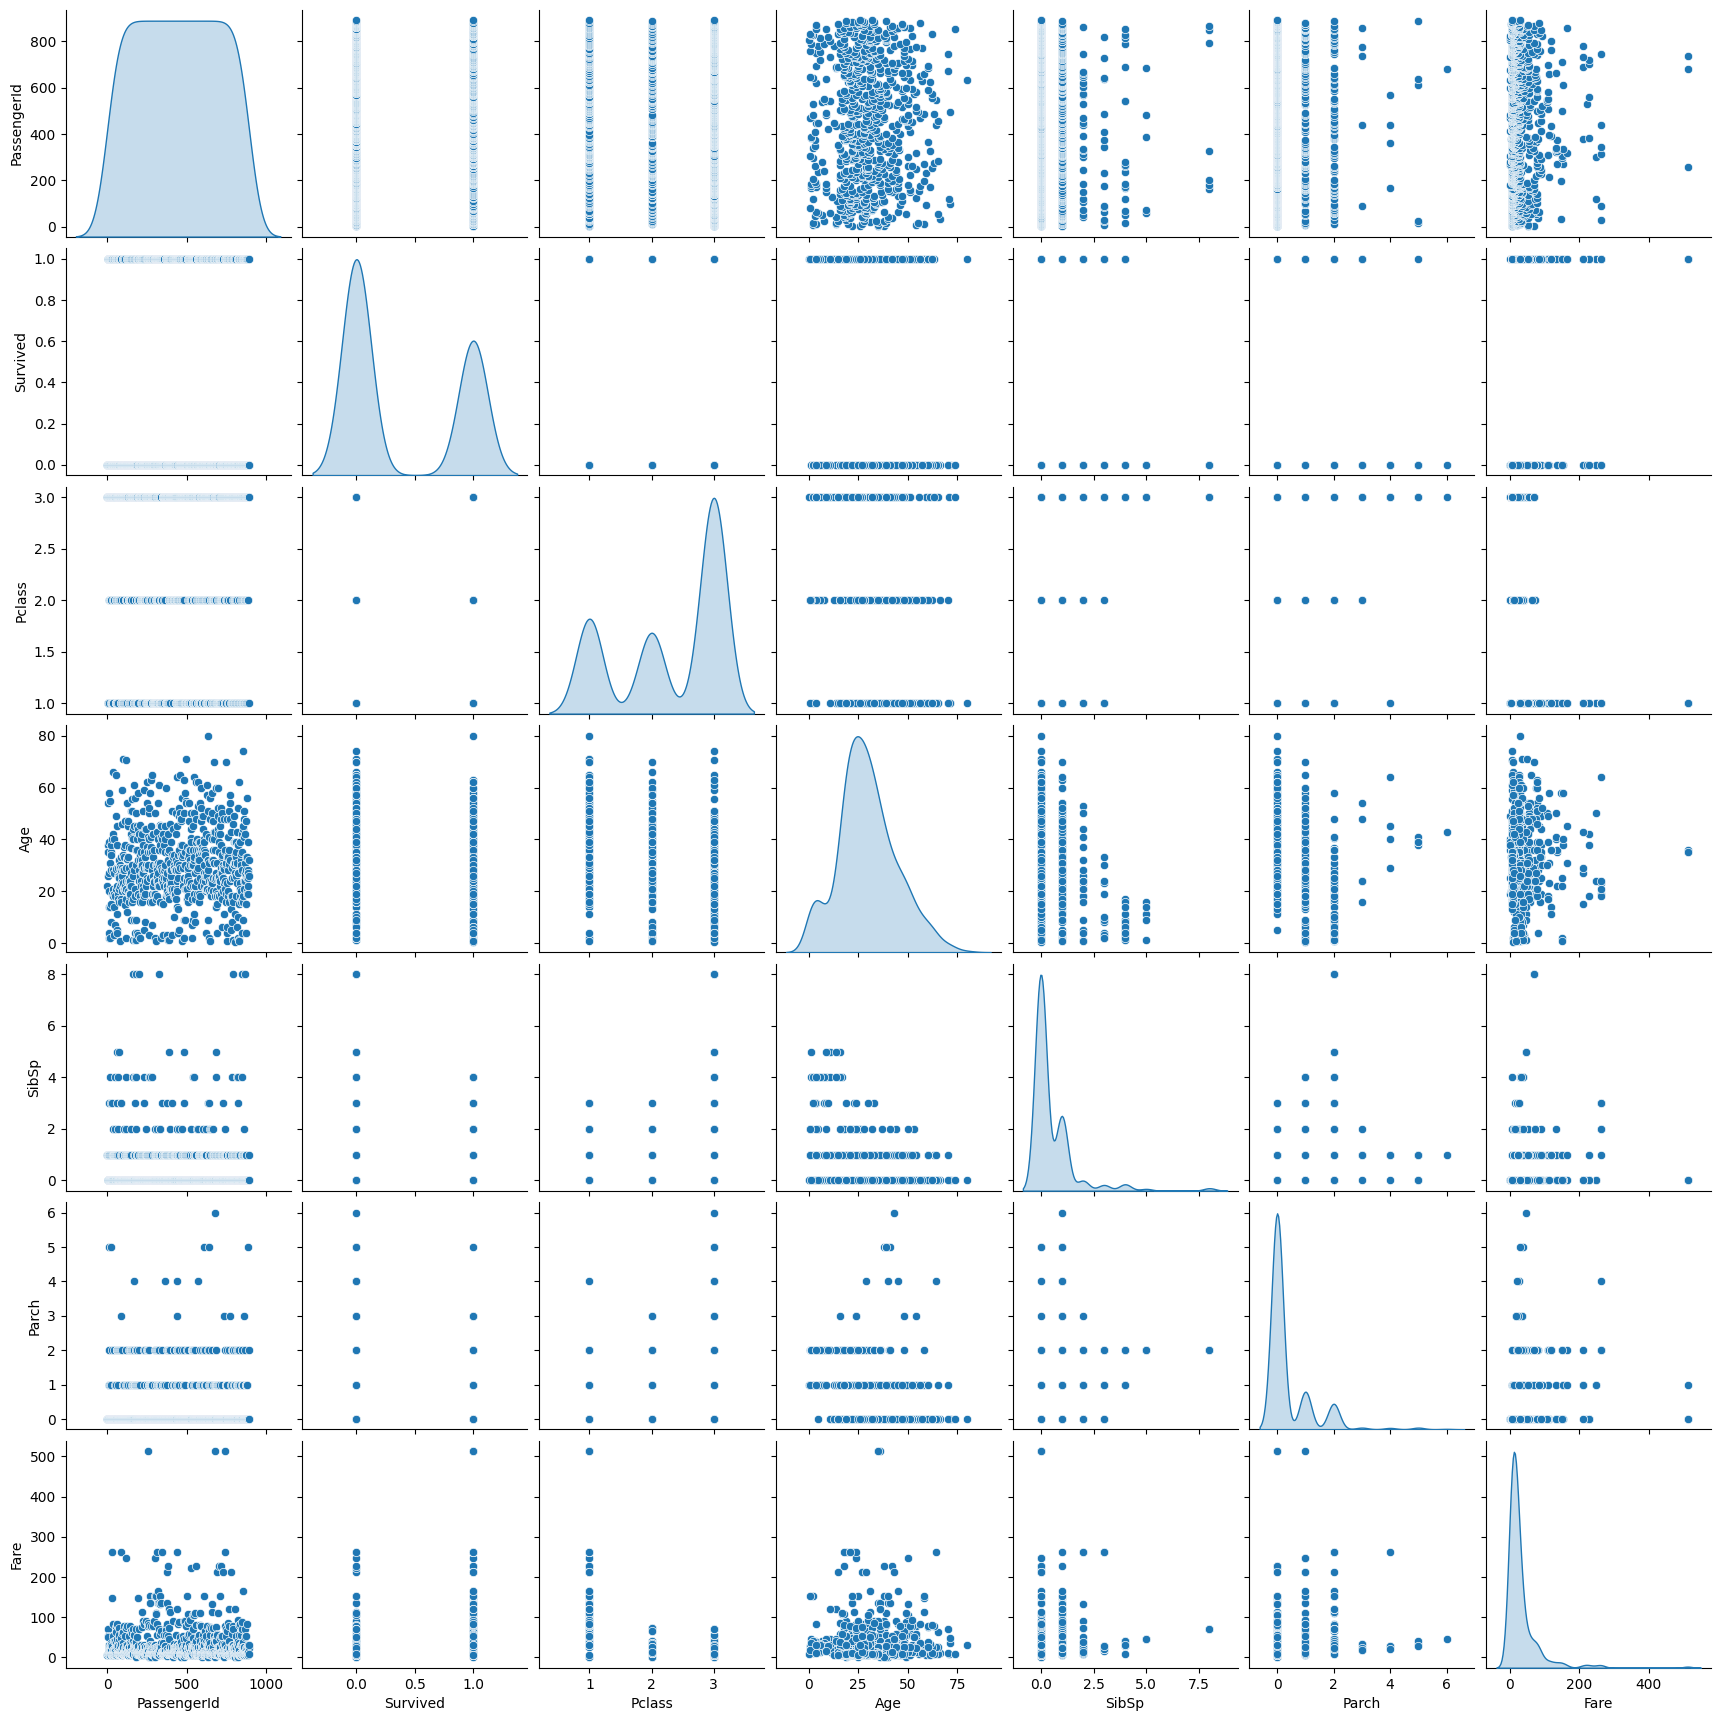

In [8]:
sns.pairplot(df, diag_kind='kde')
plt.show()

#  Correlation Heatmap

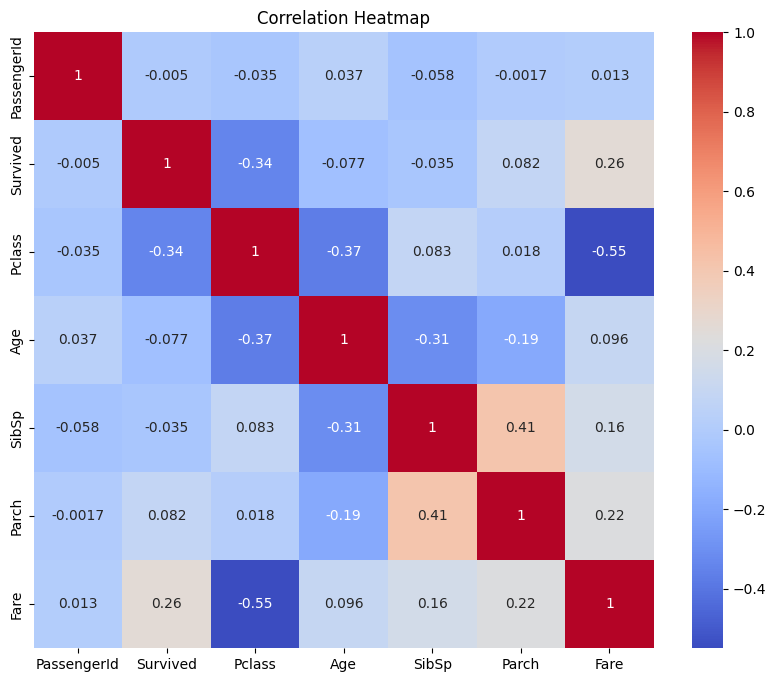

In [10]:

numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Histograms


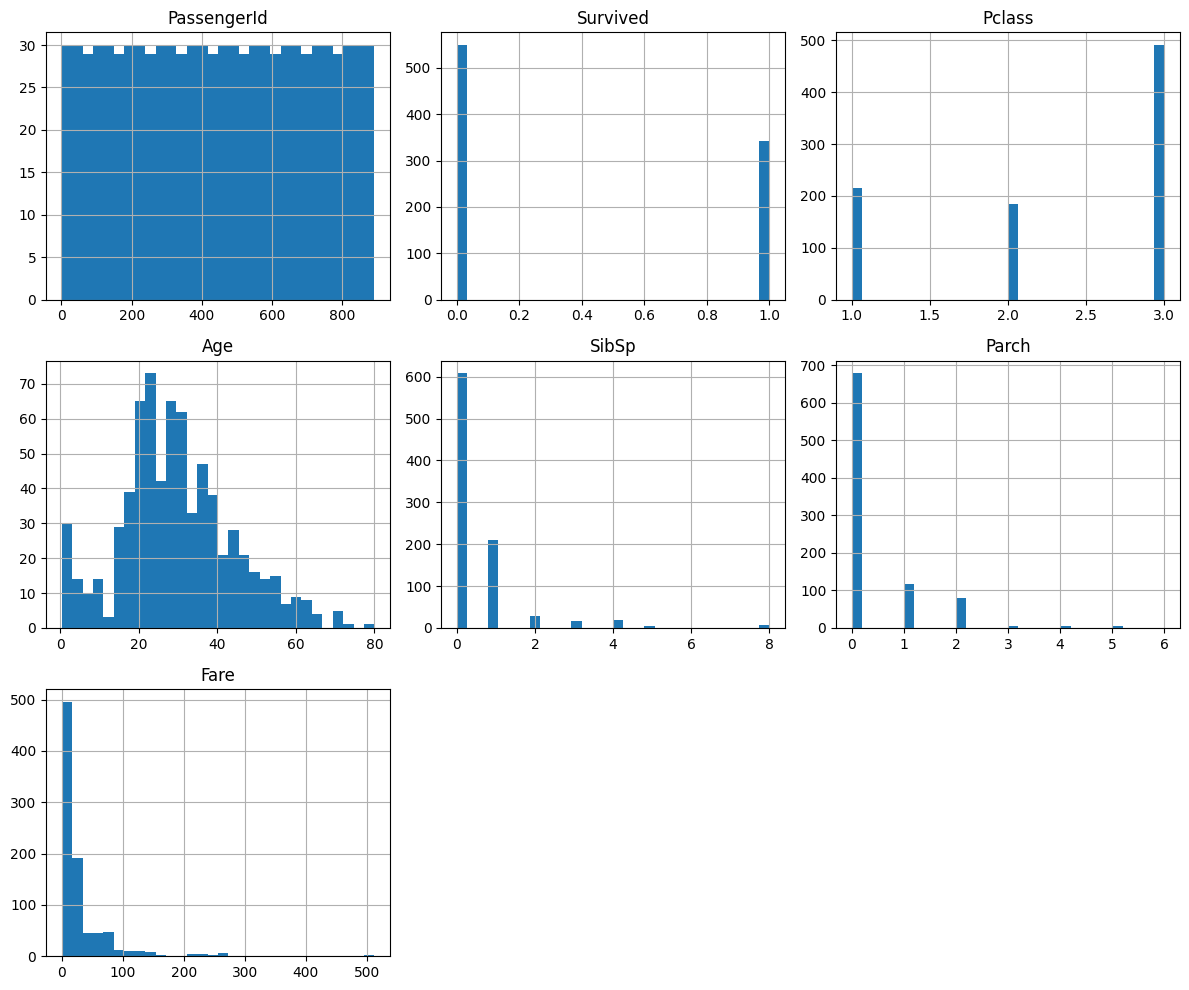

In [11]:
df.hist(figsize=(12,10), bins=30)
plt.tight_layout()
plt.show()

# Boxplots

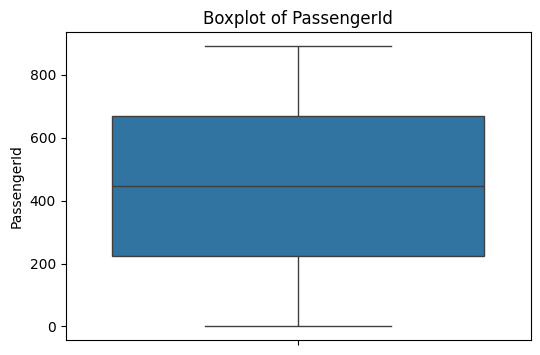

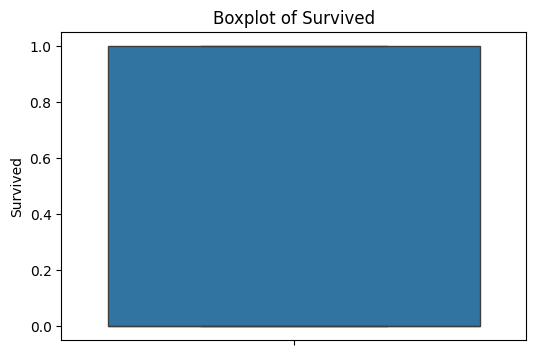

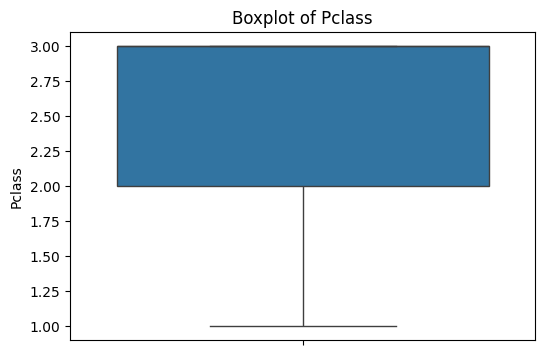

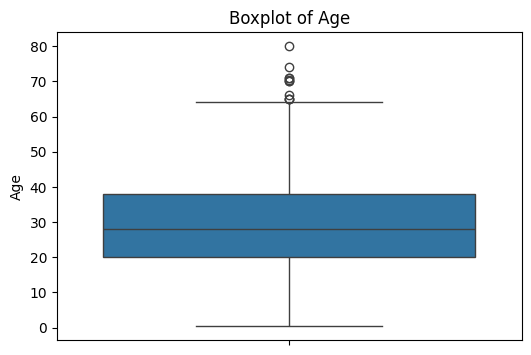

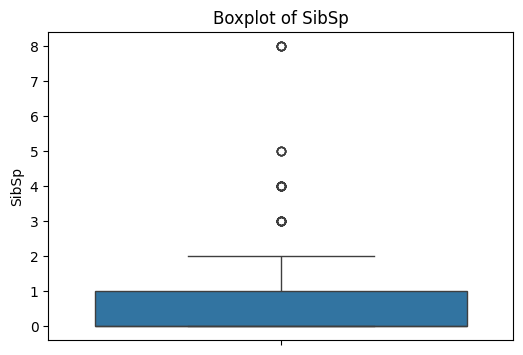

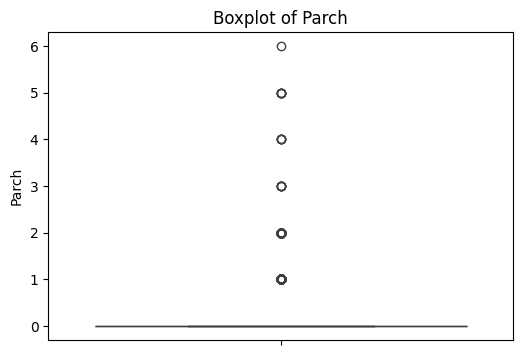

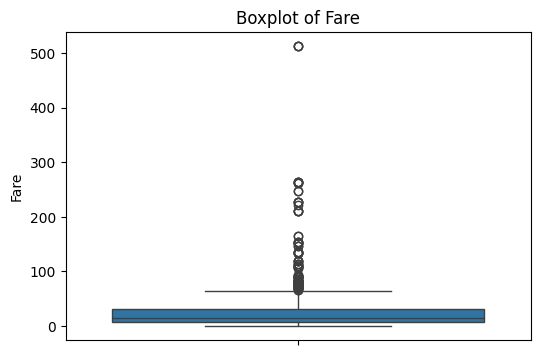

In [12]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Scatterplots for significant variable pairs

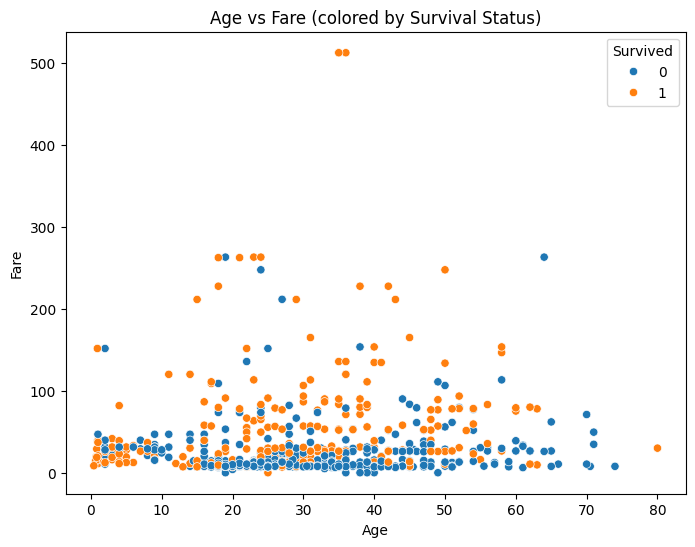

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived')
plt.title('Age vs Fare (colored by Survival Status)')
plt.show()


### 🔎 Observation for Correlation Heatmap
- Strong positive correlation between `SibSp` and `Parch`, indicating family travel groups.
- Negative correlation between `Pclass` and `Fare`, as 1st class passengers paid higher fares.
- No significant correlation between `Age` and other numeric features.


### 🔎 Observation for Age Histogram
- Age distribution is right-skewed.
- Most passengers are aged 20–40, with fewer older passengers.


# Observation for Fare Boxplot
# - Fares in 1st class are significantly higher and more variable.
# - Outliers in fare values are more common in 1st class.


### 🔎 Observation for Scatterplot (Age vs Fare, colored by Survival)
- Older and younger passengers had slightly better survival rates.
- Higher fares (1st class) are associated with higher survival.


### 🔎 Observation for Scatterplot (Age vs Fare, colored by Survival Status)
- Most passengers in the 20–40 age range paid lower fares (likely 3rd class).
- Higher fares are associated with older passengers (1st class).
- Surviving passengers (colored differently) are more frequent at higher fares, indicating higher survival rates for 1st class.
- There is no strong linear relationship between Age and Fare, but outliers suggest some older, wealthy passengers.
